# Analisis Eksplorasi Data (EDA) Dataset Obesitas

**Nama:** Tegar Haris DD  
**NIM:** A11.2022.14428  
**Kelas:** DS05

## Pendahuluan

Notebook ini berisi analisis eksplorasi data (EDA) dari dataset obesitas. Tujuan analisis ini adalah untuk memahami karakteristik data, mendeteksi masalah potensial, dan mempersiapkan data untuk pemodelan prediktif terkait tingkat obesitas berdasarkan berbagai faktor.

## 1. Import Library

Mengimpor library yang diperlukan untuk analisis data.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

# Mengatur opsi tampilan pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 2. Memuat Dataset

Memuat dataset obesitas dari file CSV dan melihat dimensi data.

In [2]:
# Memuat dataset
df = pd.read_csv('ObesityDataSet.csv')

# Melihat dimensi dataset
print(f"Dimensi dataset: {df.shape[0]} baris x {df.shape[1]} kolom")

Dimensi dataset: 2111 baris x 17 kolom


## 3. Inspeksi Data Awal

Melihat informasi umum tentang dataset dan beberapa baris pertama untuk memahami strukturnya.

In [3]:
# Menampilkan informasi dataset
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                          

In [4]:
# Menampilkan 5 baris pertama dataset
print("Lima baris pertama dataset:")
df.head()

Lima baris pertama dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Ringkasan statistik deskriptif
df.describe().T

,count,unique,top,freq
Age,2097,1394,18,124
Gender,2102,3,Male,1056
Height,2099,1562,1.7,58
Weight,2100,1518,80,58
CALC,2106,5,Sometimes,1386
FAVC,2100,3,yes,1844
FCVC,2103,808,3,647
NCP,2099,637,3,1183
SCC,2101,3,no,1997
SMOKE,2106,3,no,2054


## 4. Pembersihan Data

Berdasarkan inspeksi awal, beberapa masalah data yang teridentifikasi:

1. Kolom `Age`, `Height`, `Weight`, `FAF`, `TUE`, `FCVC`, `CH2O`, `NCP` seharusnya bertipe numerik, tetapi tersimpan sebagai *object*
2. Ada kemungkinan terdapat karakter khusus (koma sebagai pemisah desimal) yang perlu diganti dengan titik
3. Ada nilai yang hilang ('?') yang perlu ditangani

In [6]:
# Mengganti nilai '?' dengan NaN
df.replace('?', np.nan, inplace=True)

# Mendefinisikan kolom numerik yang perlu dikonversi
cols_numerik = ['Age', 'Height', 'Weight', 'FAF', 'TUE', 'FCVC', 'CH2O', 'NCP']

# Mengkonversi kolom numerik (mengganti koma dengan titik)
for col in cols_numerik:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Verifikasi tipe data setelah konversi
print("Tipe data setelah konversi:")
df.dtypes.head(10)

Tipe data setelah konversi:


Age       float64
Gender     object
Height    float64
Weight    float64
CALC       object
FAVC       object
FCVC      float64
NCP       float64
SCC        object
SMOKE      object
dtype: object

## 5. Penanganan Data yang Hilang

Memeriksa dan menangani nilai yang hilang dalam dataset.

Jumlah nilai yang hilang per kolom:
family_history_with_overweight    23
Age                               22
Gender                            22
Height                            22
FAVC                              22
NCP                               22
CALC                              20
Weight                            19
FAF                               19
FCVC                              18
SCC                               18
CAEC                              18
CH2O                              15
TUE                               15
SMOKE                             13
MTRANS                            12
dtype: int64


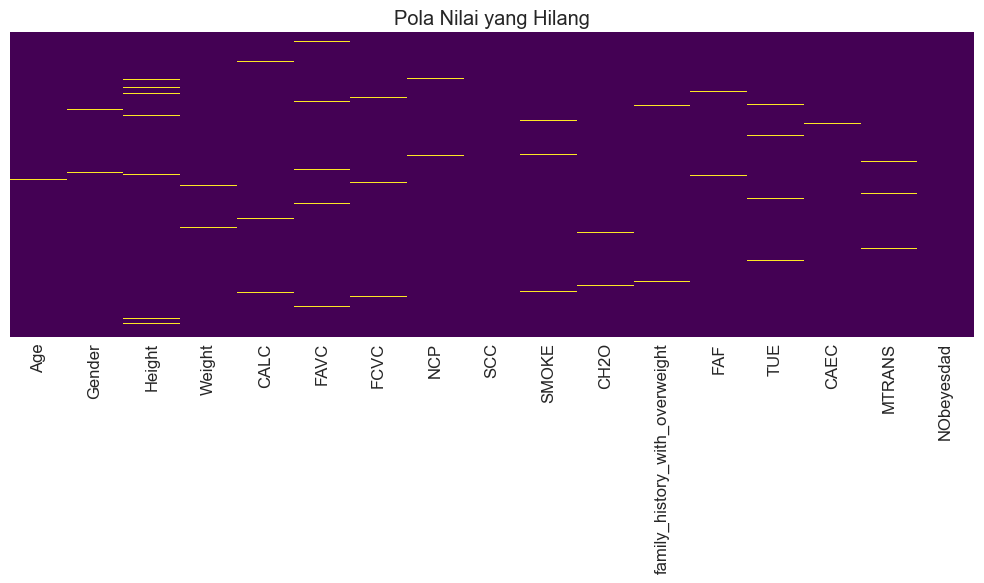


Ukuran dataset setelah menghapus nilai yang hilang: 1811 baris x 17 kolom
Jumlah baris yang dihapus: 300


In [7]:
# Memeriksa nilai yang hilang
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print("Jumlah nilai yang hilang per kolom:")
    print(missing)
    
    # Visualisasi nilai yang hilang
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Pola Nilai yang Hilang')
    plt.tight_layout()
    plt.show()
    
    # Menghapus baris dengan nilai yang hilang
    df_clean = df.dropna()
    print(f"\nUkuran dataset setelah menghapus nilai yang hilang: {df_clean.shape[0]} baris x {df_clean.shape[1]} kolom")
    print(f"Jumlah baris yang dihapus: {df.shape[0] - df_clean.shape[0]}")
    
    # Menggunakan dataset yang sudah dibersihkan
    df = df_clean
else:
    print("Tidak ada nilai yang hilang dalam dataset.")

## 6. Analisis Variabel Target

Memeriksa distribusi variabel target `NObeyesdad` untuk melihat keseimbangan kelas.

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\590043885.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='NObeyesdad', order=target_counts.index, palette='viridis')


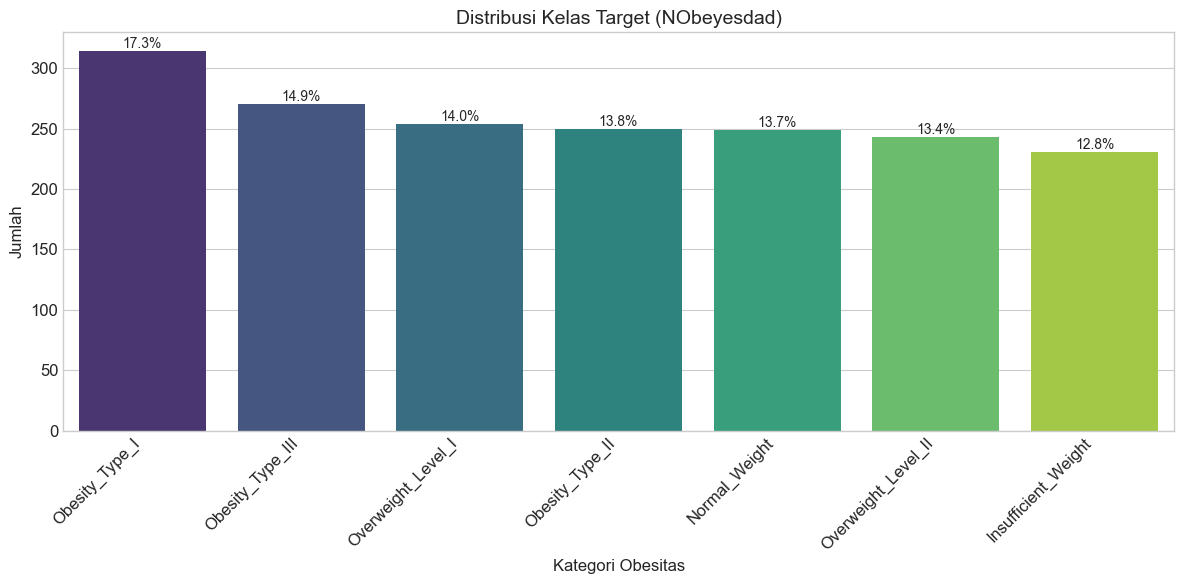

Statistik Kelas Target:
                     Jumlah  Persentase
NObeyesdad                             
Obesity_Type_I          314       17.34
Obesity_Type_III        270       14.91
Overweight_Level_I      254       14.03
Obesity_Type_II         250       13.80
Normal_Weight           249       13.75
Overweight_Level_II     243       13.42
Insufficient_Weight     231       12.76


In [8]:
# Menghitung frekuensi setiap kelas target
target_counts = df['NObeyesdad'].value_counts()
total = len(df)

# Visualisasi distribusi kelas target
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='NObeyesdad', order=target_counts.index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=14)
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')

# Menambahkan persentase di atas batang
for i, p in enumerate(ax.patches):
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Tampilkan statistik kelas target
target_stats = pd.DataFrame({
    'Jumlah': target_counts,
    'Persentase': (target_counts / total * 100).round(2)
})
print("Statistik Kelas Target:")
print(target_stats)

## 7. Analisis Fitur Numerik

Menganalisis distribusi fitur numerik dan hubungannya dengan variabel target.

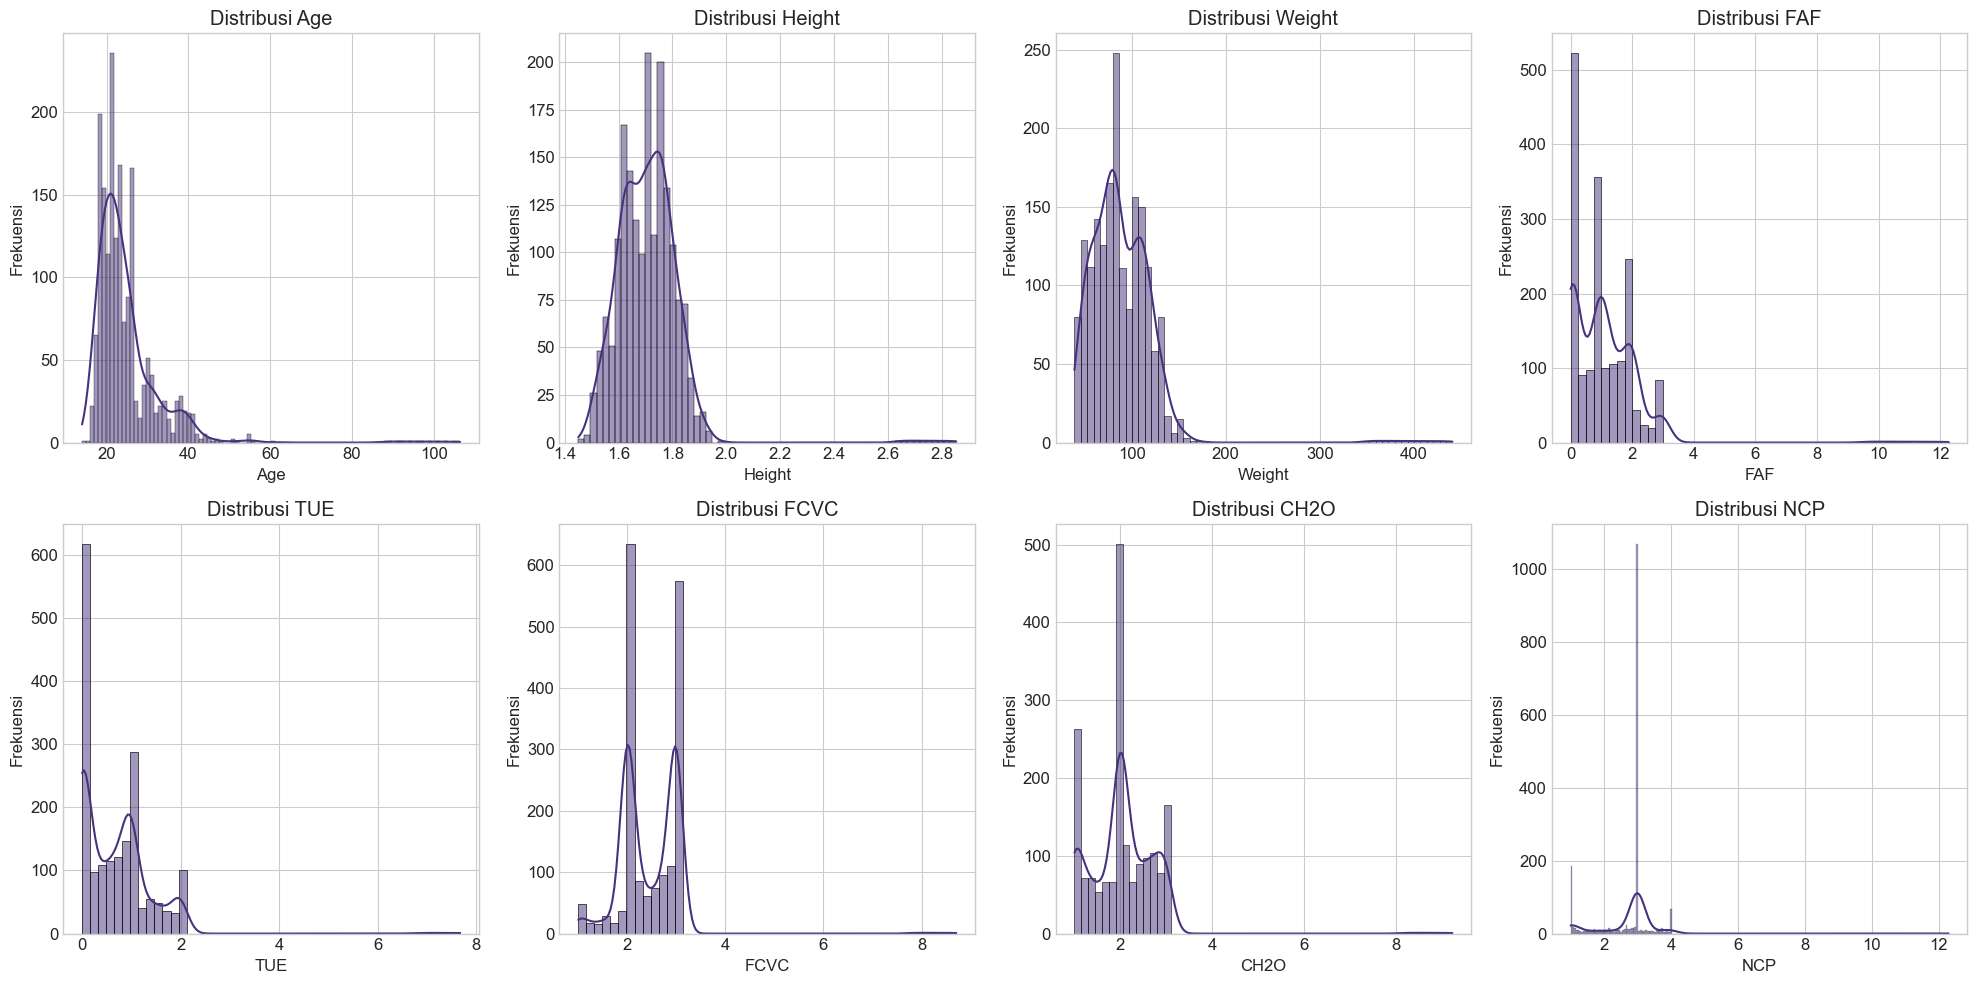

In [9]:
# Visualisasi distribusi fitur numerik
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(cols_numerik):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\3952546204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


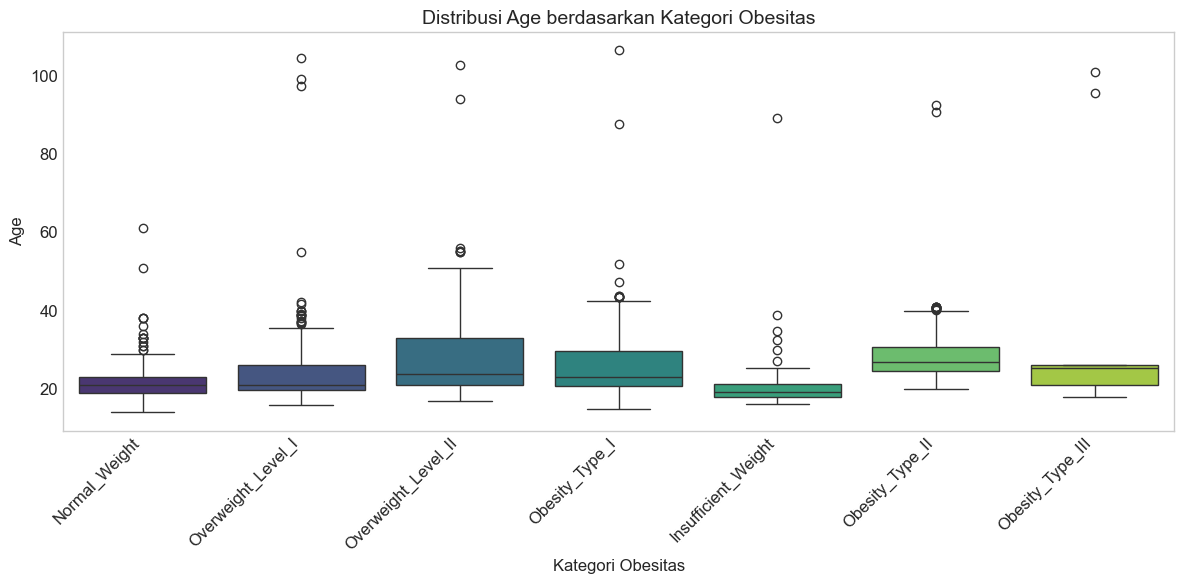

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\3952546204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


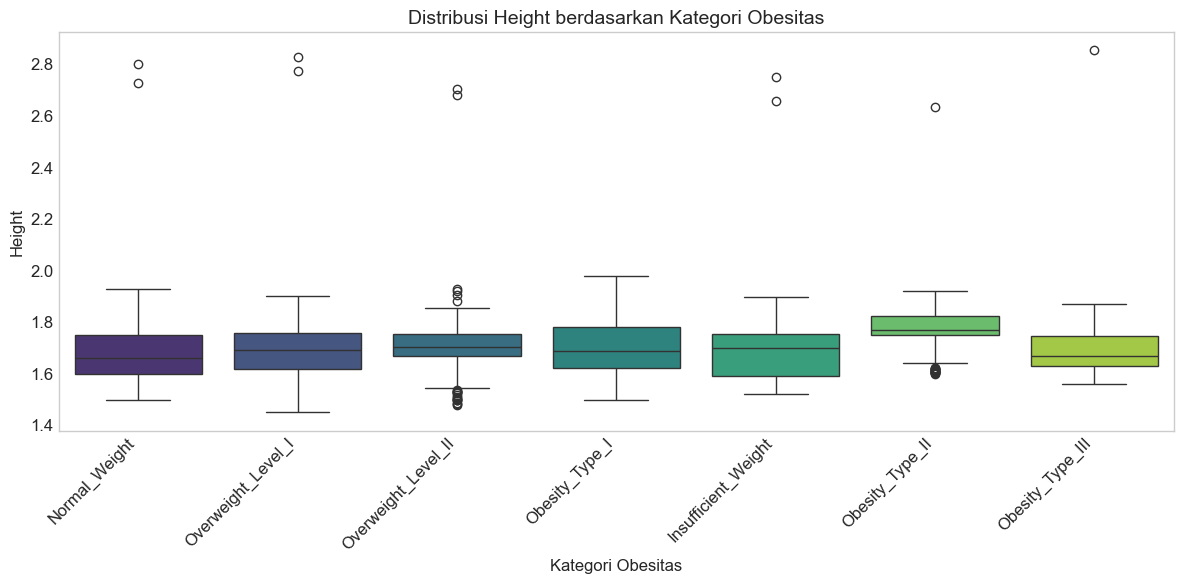

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\3952546204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


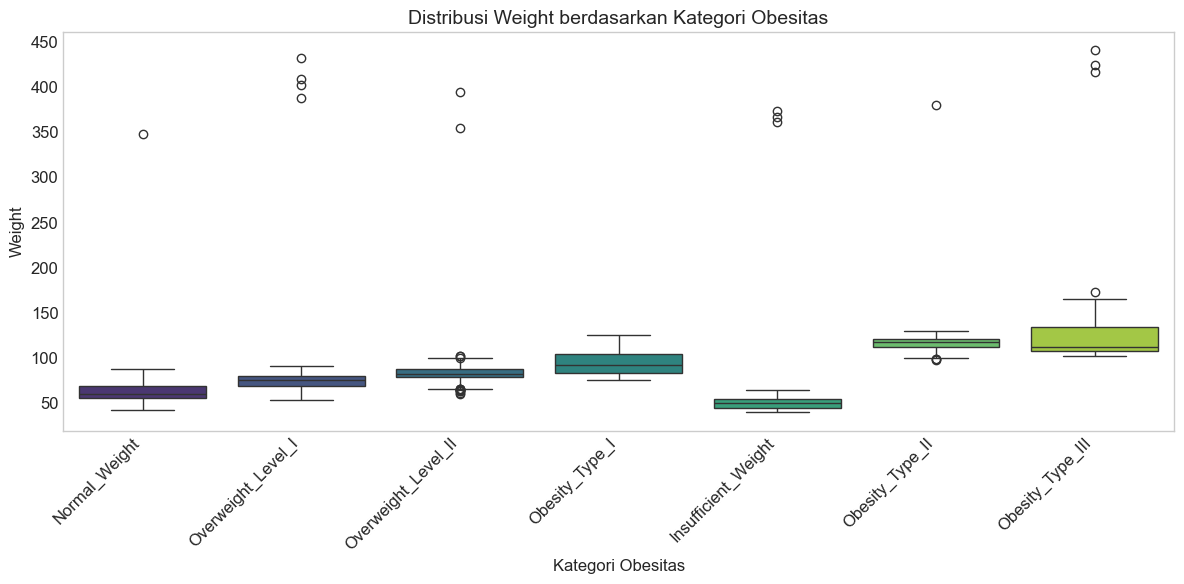

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\3952546204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


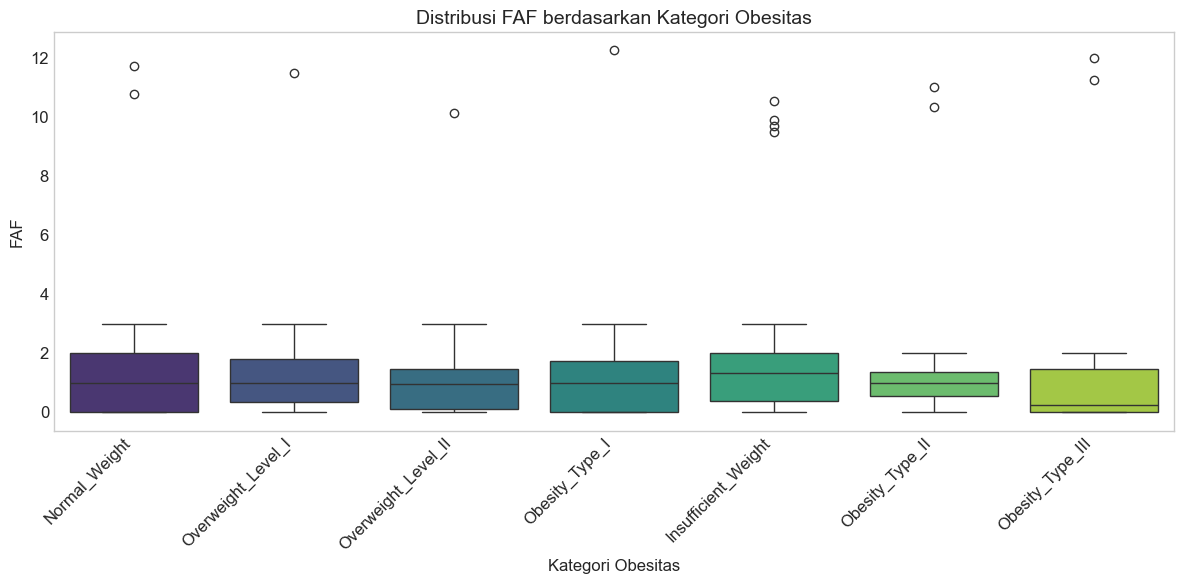

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\3952546204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


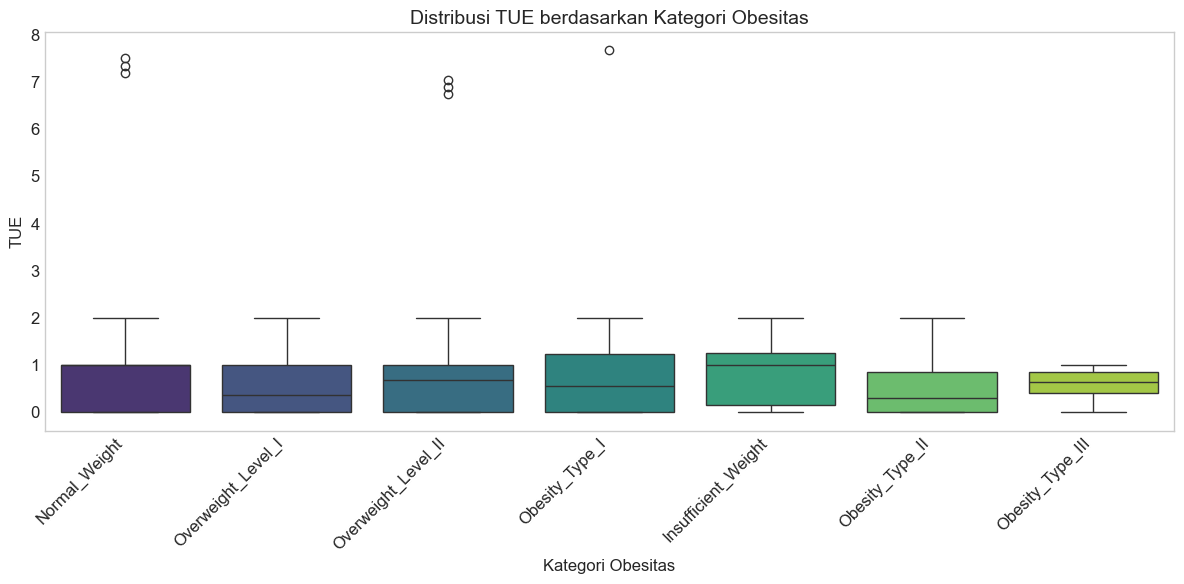

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\3952546204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


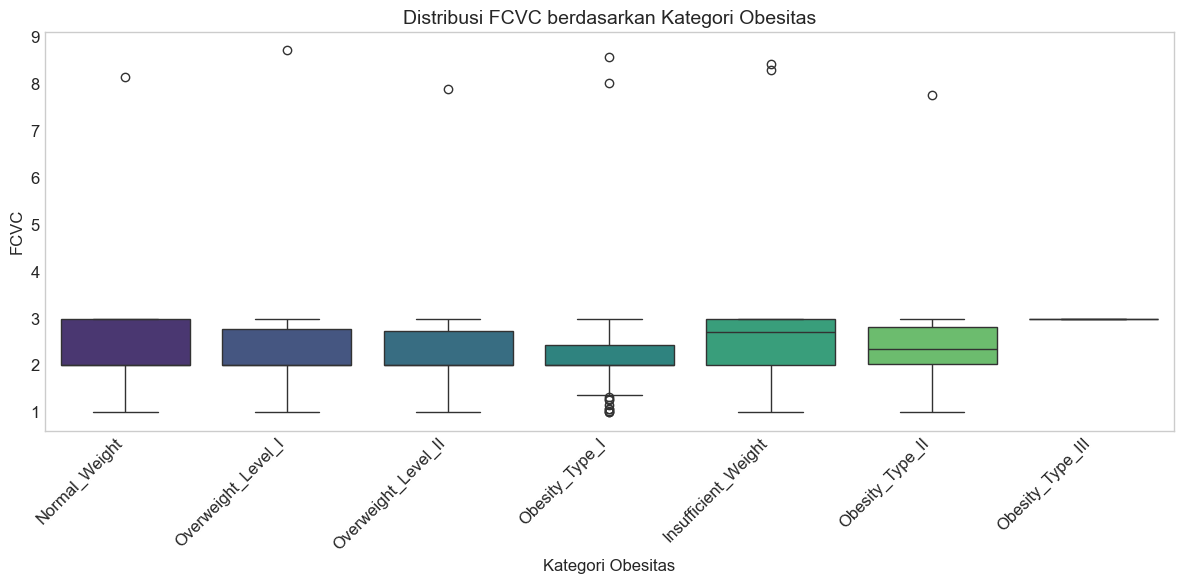

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\3952546204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


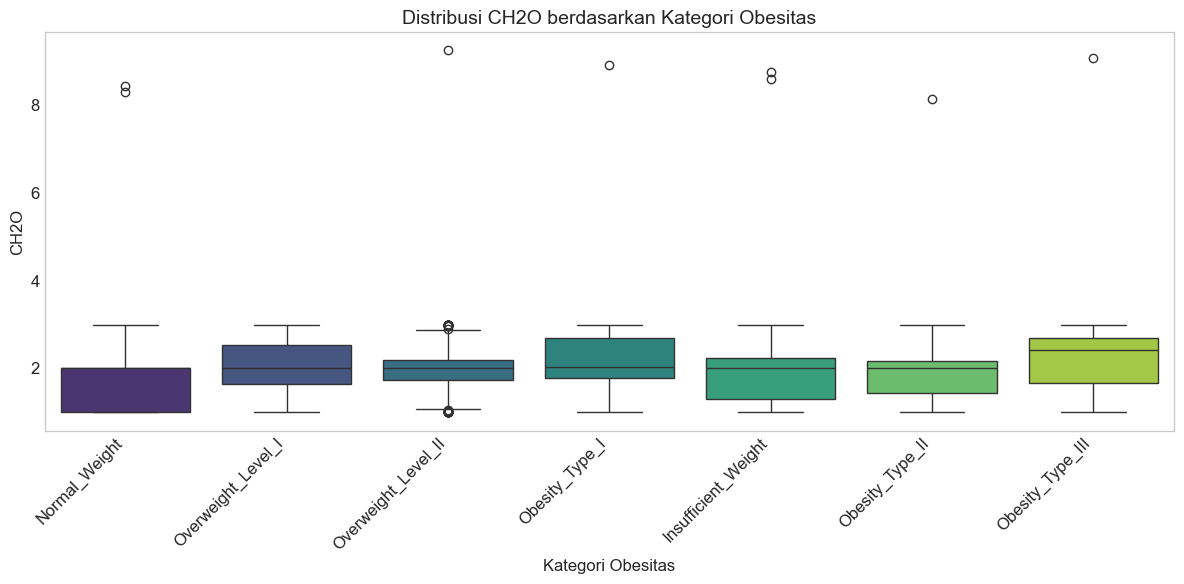

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\3952546204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')


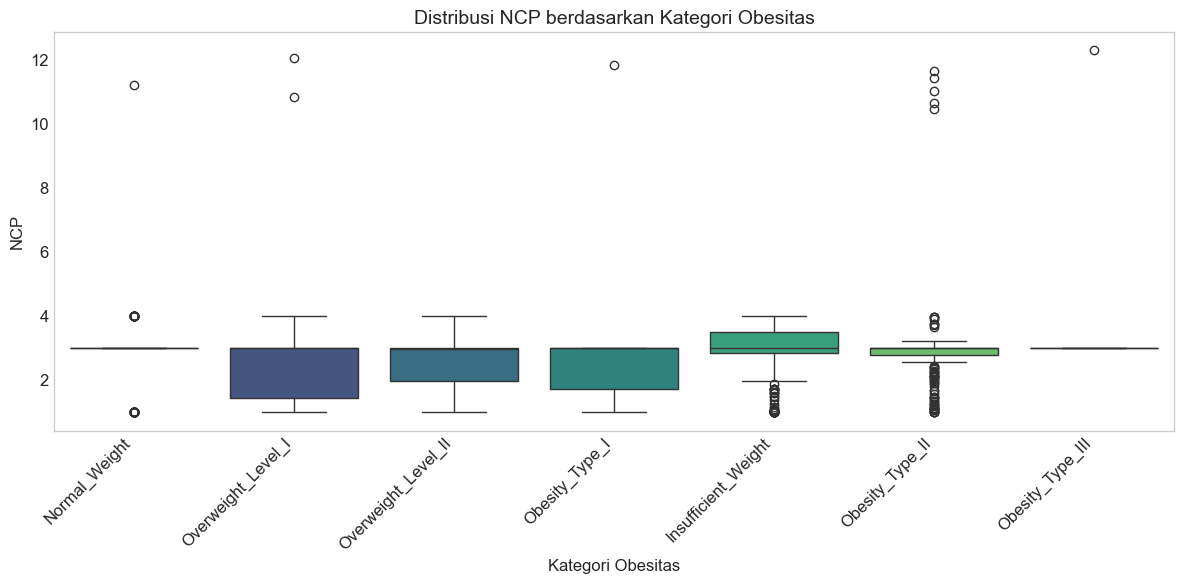

In [10]:
# Visualisasi boxplot untuk fitur numerik berdasarkan kelas target
for col in cols_numerik:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')
    plt.xlabel('Kategori Obesitas', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.title(f'Distribusi {col} berdasarkan Kategori Obesitas', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

## 8. Analisis Korelasi

Memeriksa korelasi antar fitur numerik untuk mengidentifikasi hubungan potensial.

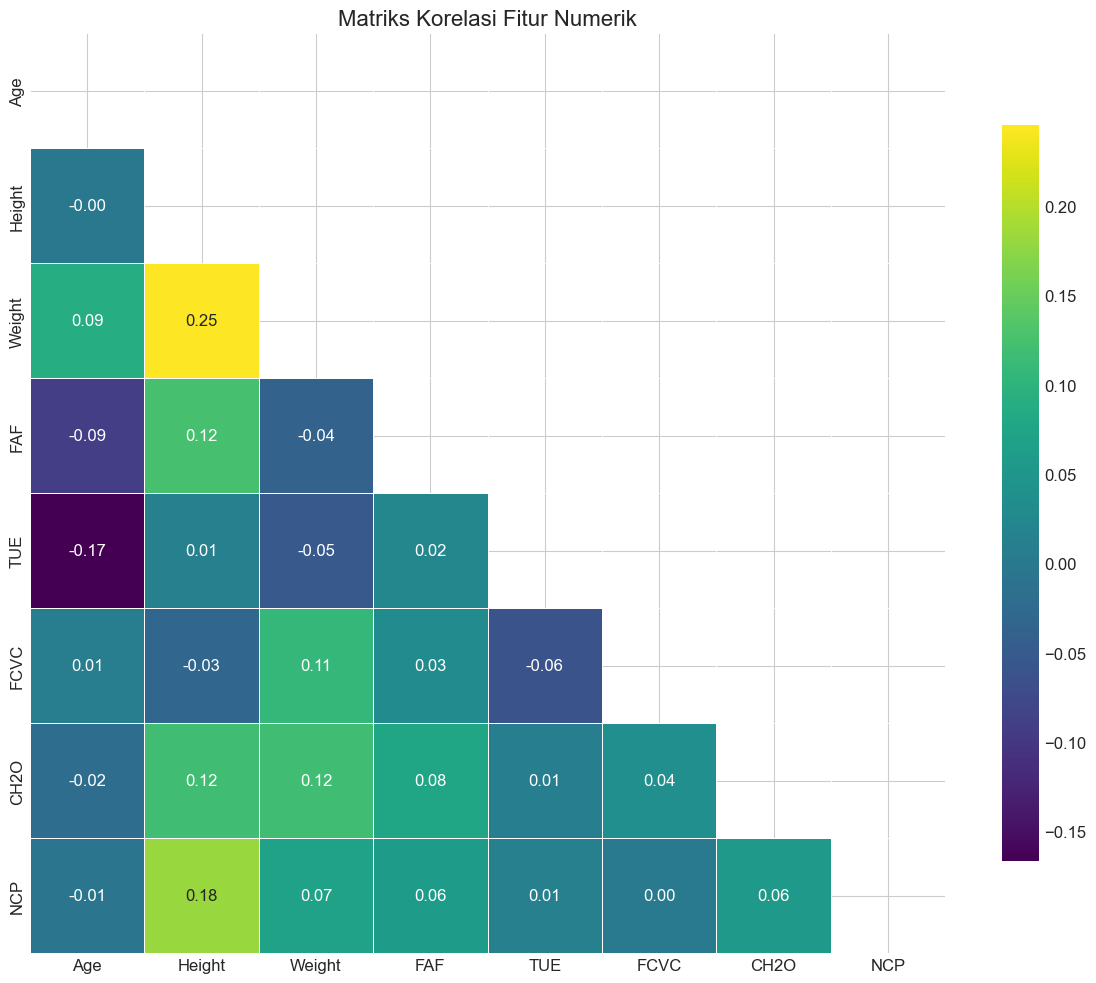

In [11]:
# Hitung dan visualisasikan matriks korelasi
corr_matrix = df[cols_numerik].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

## 9. Analisis Fitur Kategorikal

Menganalisis distribusi fitur kategorikal dan hubungannya dengan variabel target.

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\335740174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


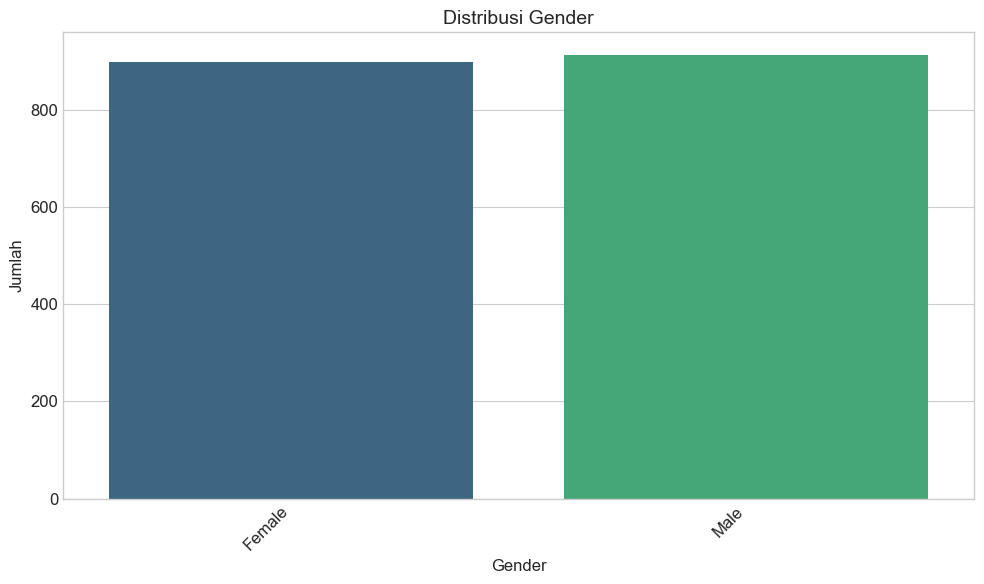

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\335740174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


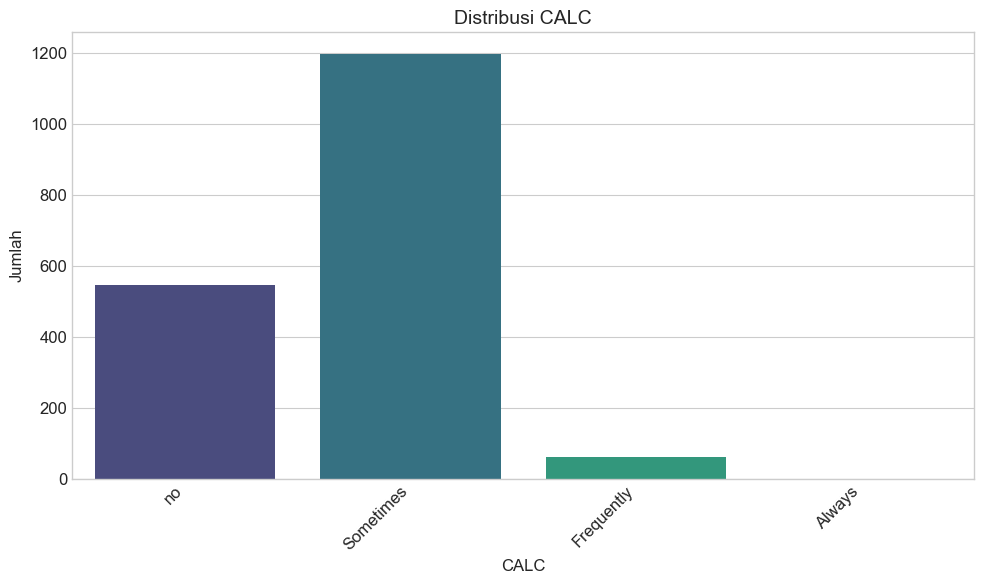

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\335740174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


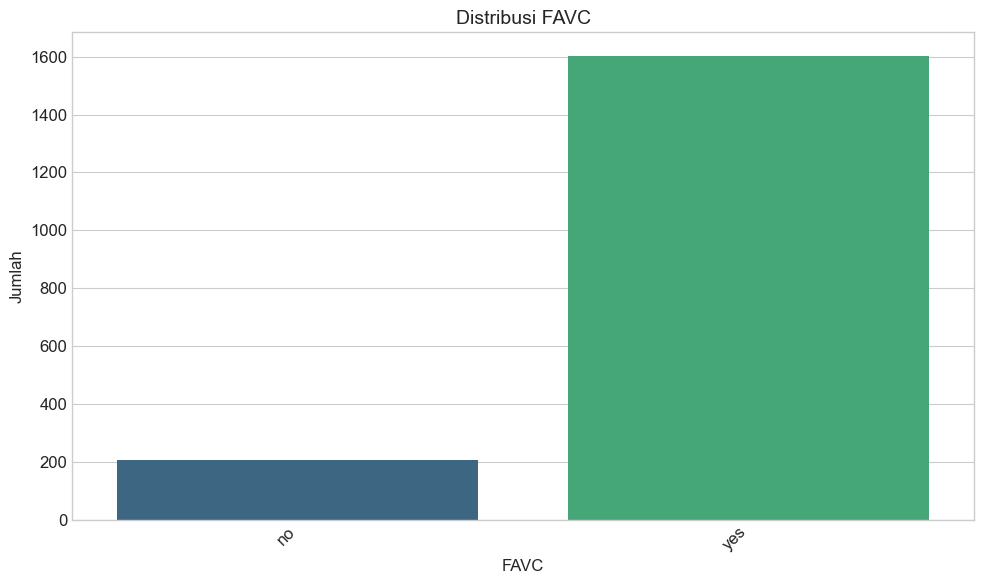

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\335740174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


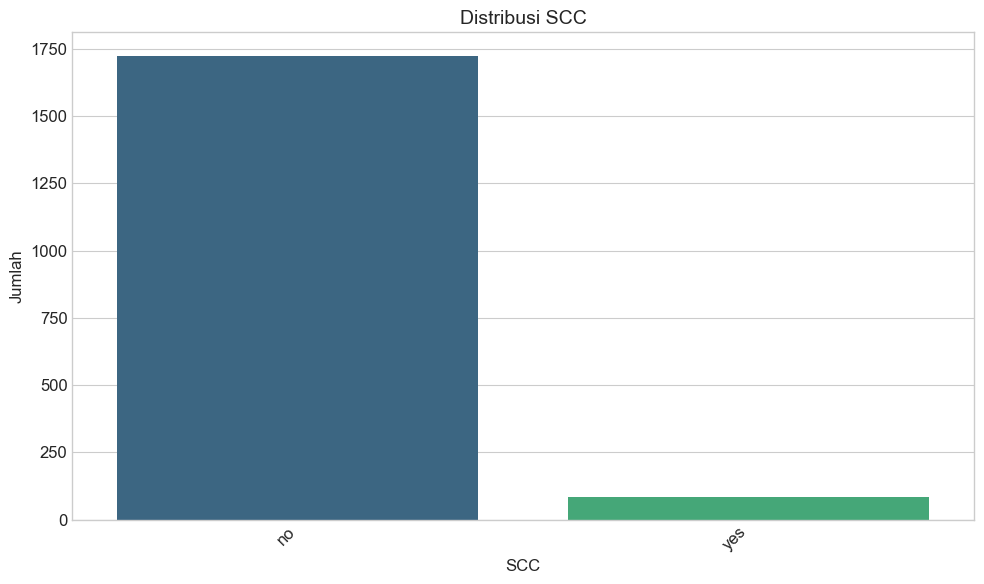

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\335740174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


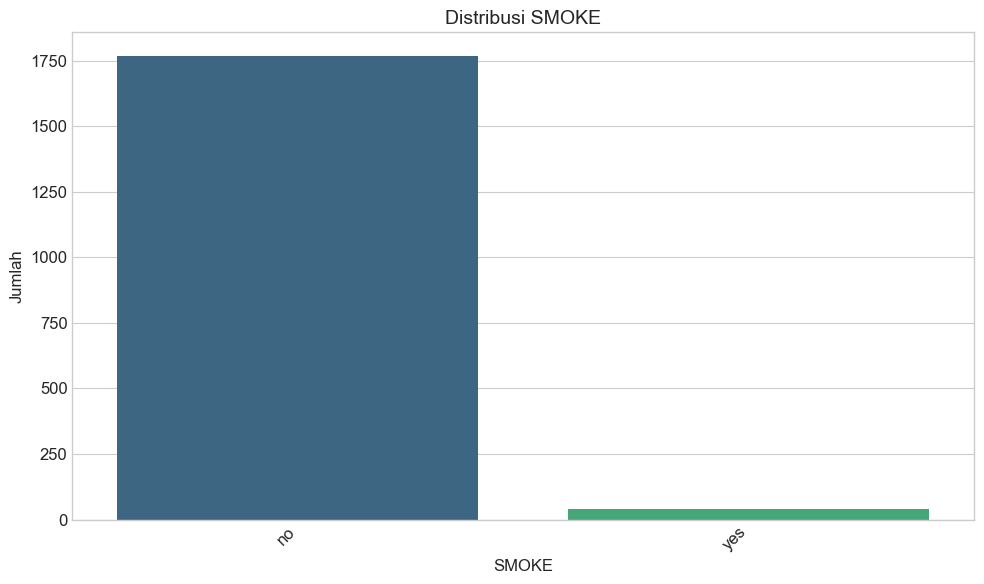

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\335740174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


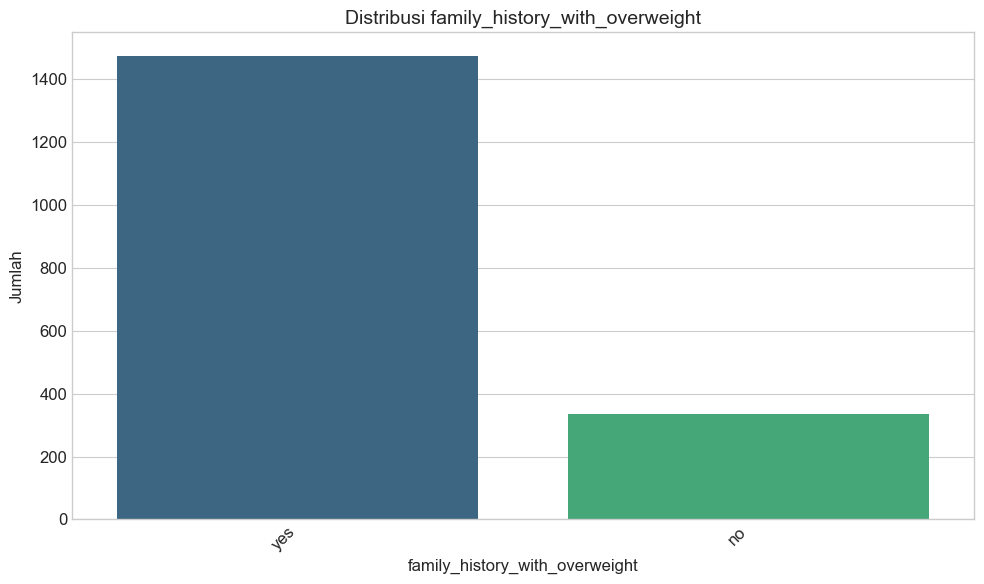

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\335740174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


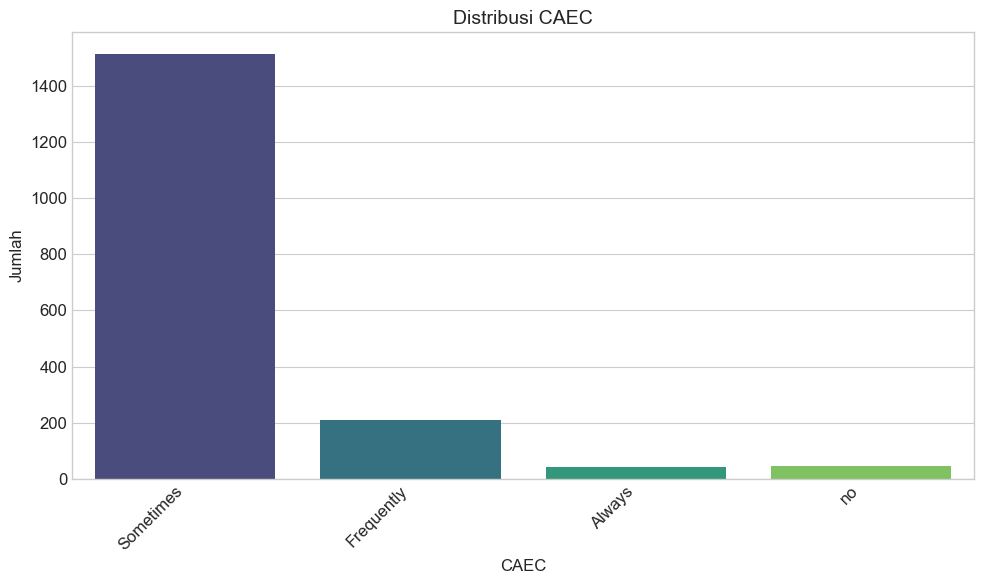

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\335740174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


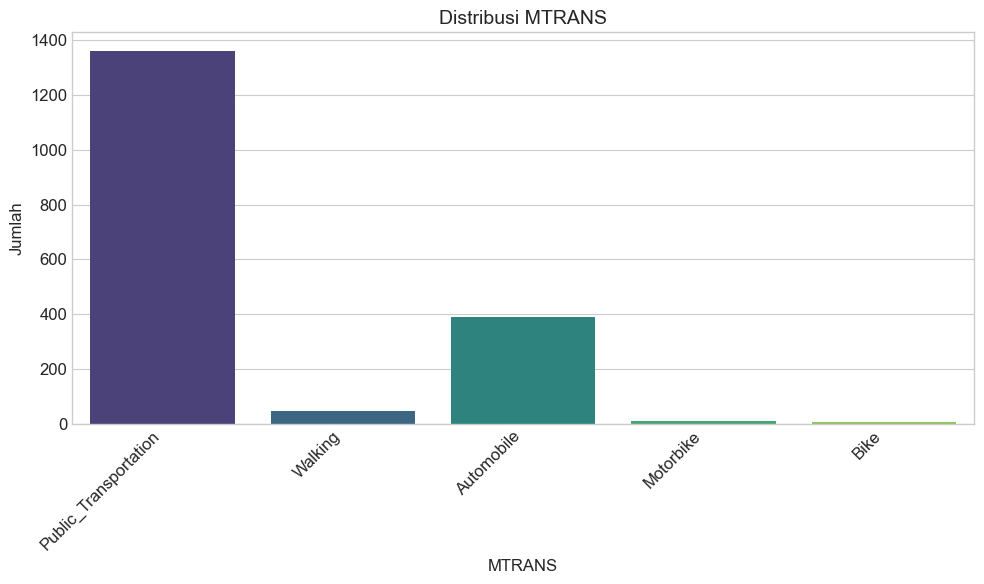

In [12]:
# Identifikasi kolom kategorikal (non-numerik dan bukan target)
cat_cols = [col for col in df.columns if col not in cols_numerik and col != 'NObeyesdad']

# Visualisasi distribusi fitur kategorikal
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

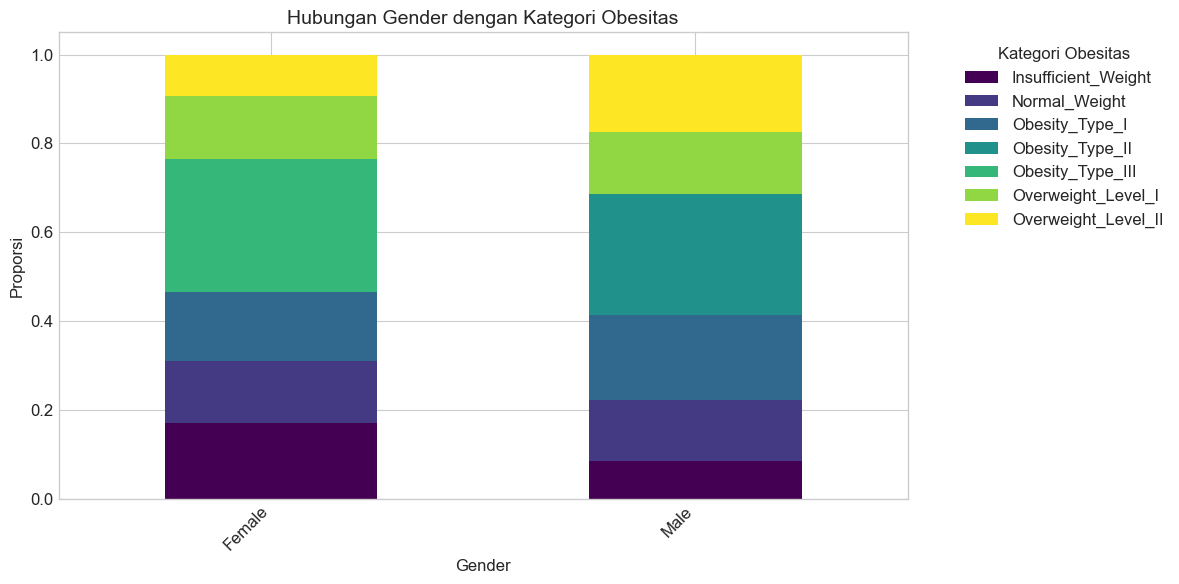

<Figure size 1200x600 with 0 Axes>

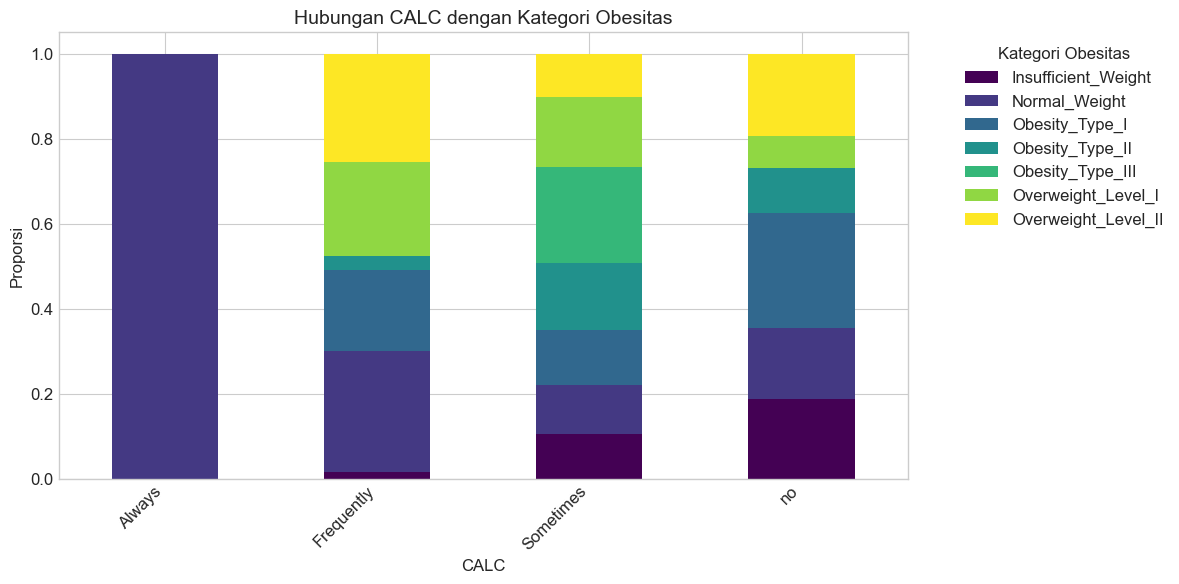

<Figure size 1200x600 with 0 Axes>

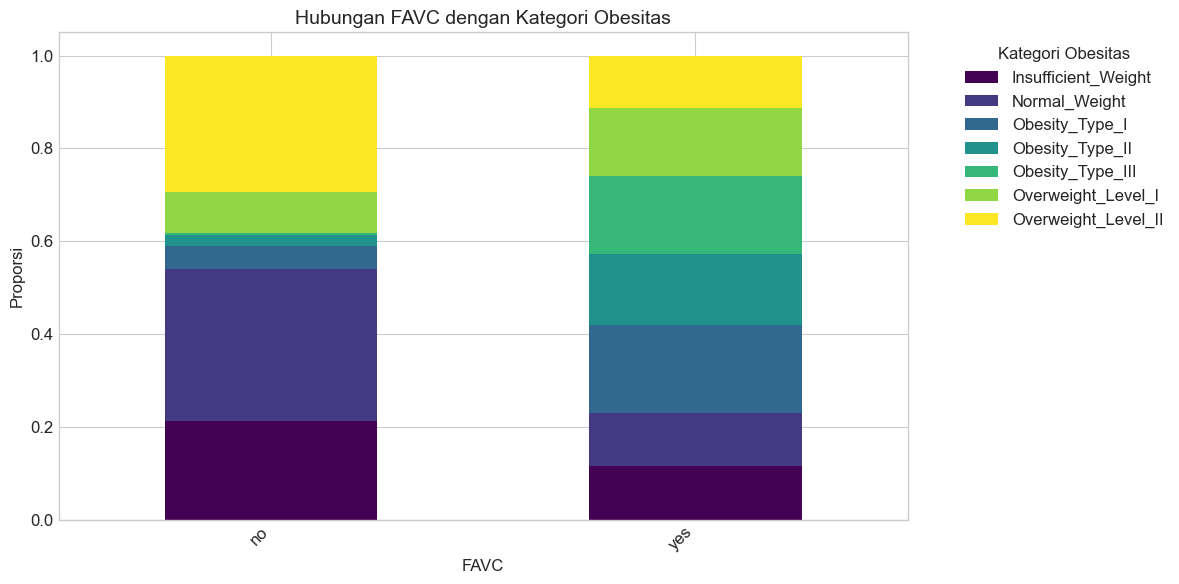

<Figure size 1200x600 with 0 Axes>

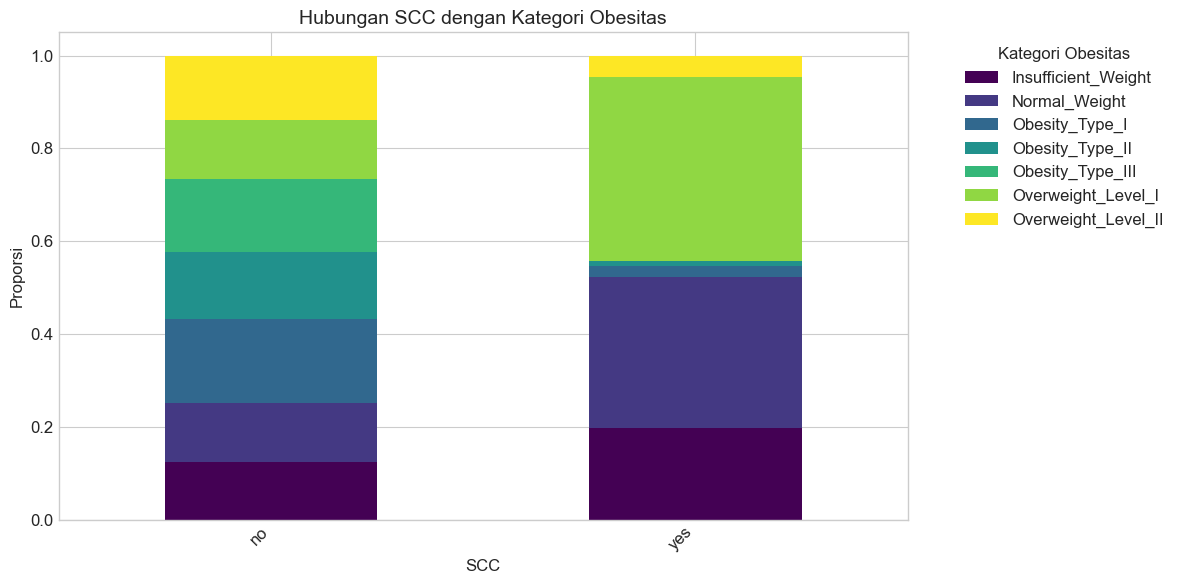

<Figure size 1200x600 with 0 Axes>

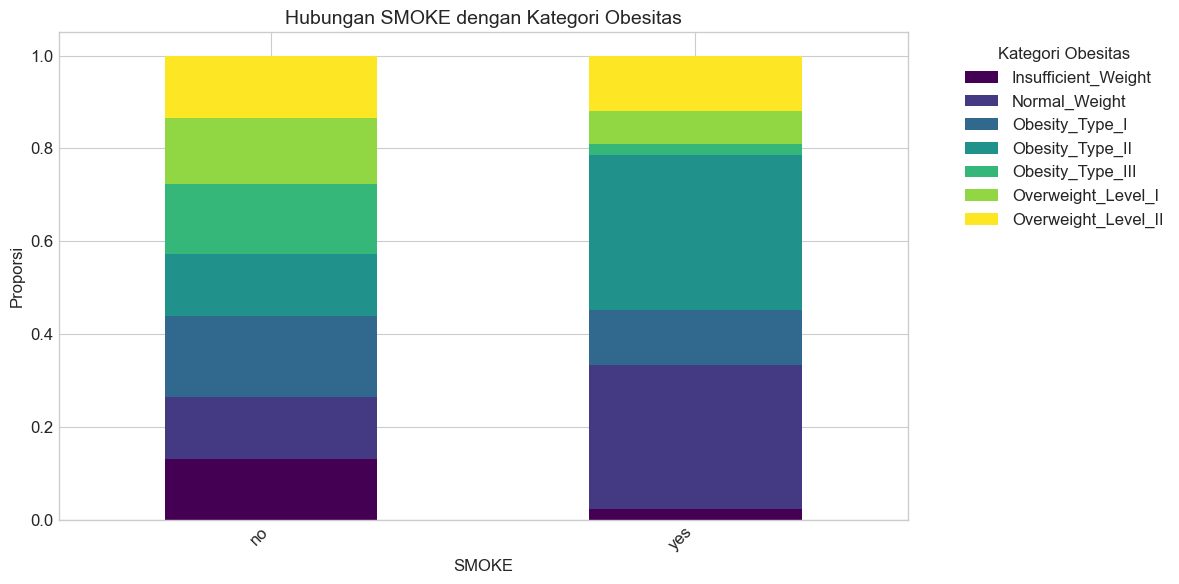

<Figure size 1200x600 with 0 Axes>

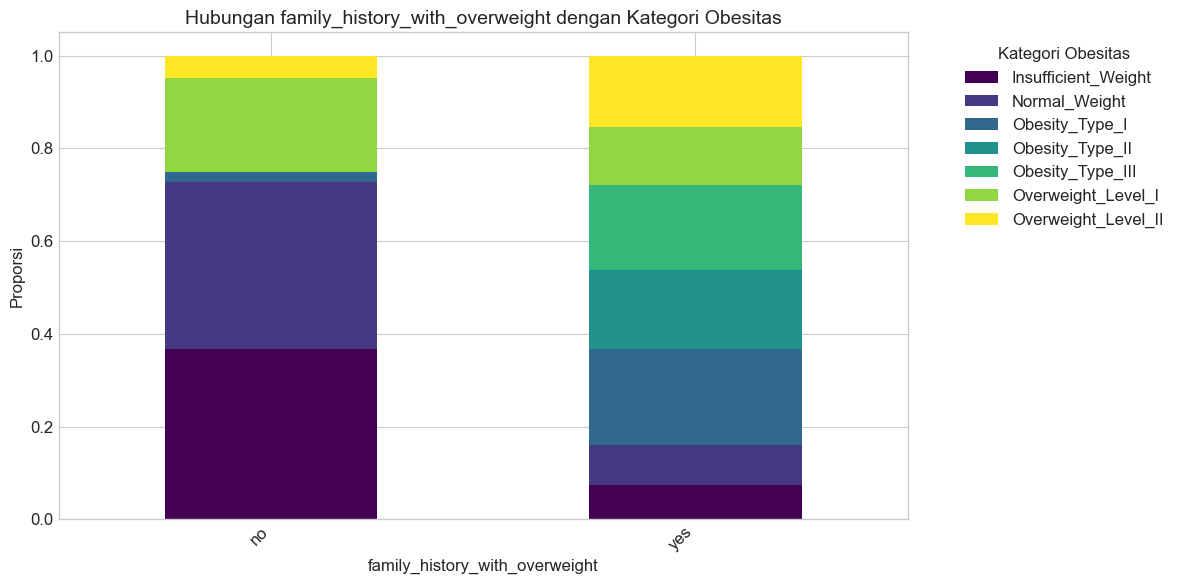

<Figure size 1200x600 with 0 Axes>

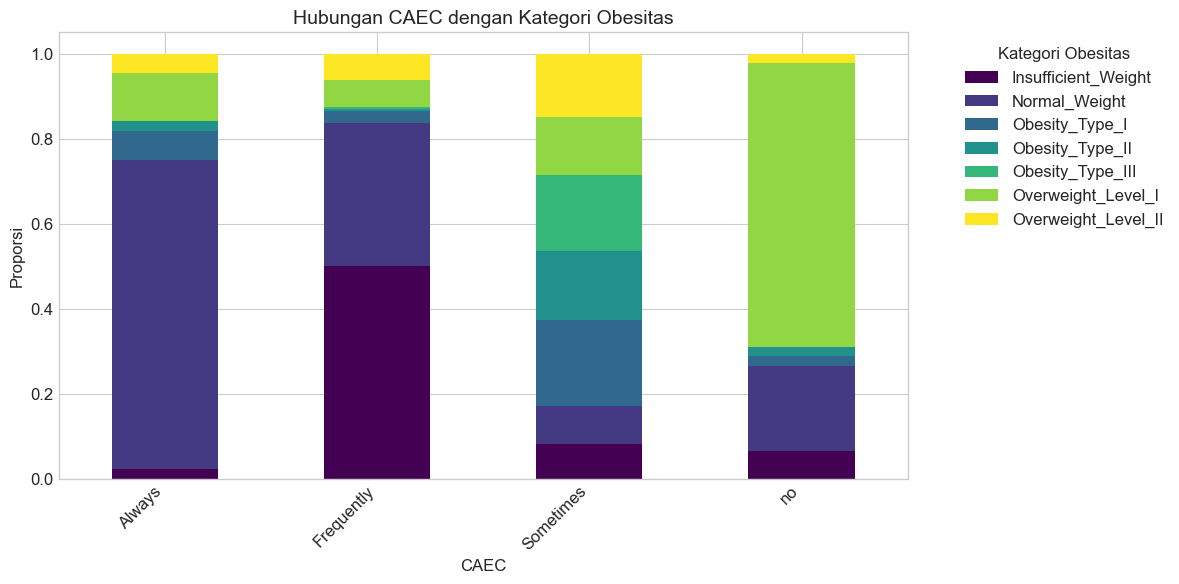

<Figure size 1200x600 with 0 Axes>

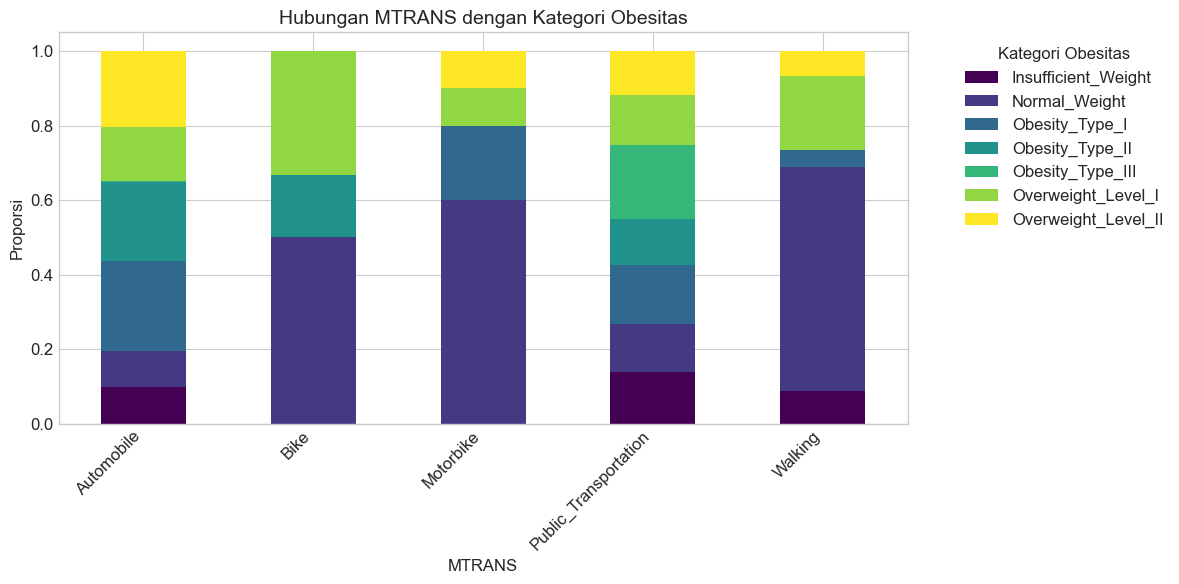

In [13]:
# Visualisasi hubungan antara fitur kategorikal dan target
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    crosstab = pd.crosstab(df[col], df['NObeyesdad'])
    crosstab_norm = crosstab.div(crosstab.sum(1), axis=0)
    
    crosstab_norm.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Hubungan {col} dengan Kategori Obesitas', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Proporsi')
    plt.legend(title='Kategori Obesitas', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 10. Deteksi Outlier

Mendeteksi outlier pada fitur numerik untuk pertimbangan dalam pembersihan data lebih lanjut.

In [14]:
# Deteksi outlier menggunakan IQR
for col in cols_numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Outlier pada {col}:")
    print(f"  - Jumlah outlier: {len(outliers)}")
    print(f"  - Persentase: {len(outliers) / len(df) * 100:.2f}%")
    print(f"  - Batas bawah: {lower_bound:.2f}")
    print(f"  - Batas atas: {upper_bound:.2f}")
    print(f"  - Nilai minimum: {df[col].min():.2f}")
    print(f"  - Nilai maksimum: {df[col].max():.2f}\n")

Outlier pada Age:
  - Jumlah outlier: 161
  - Persentase: 8.89%
  - Batas bawah: 10.99
  - Batas atas: 35.00
  - Nilai minimum: 14.00
  - Nilai maksimum: 106.44

Outlier pada Height:
  - Jumlah outlier: 11
  - Persentase: 0.61%
  - Batas bawah: 1.42
  - Batas atas: 1.98
  - Nilai minimum: 1.45
  - Nilai maksimum: 2.85

Outlier pada Weight:
  - Jumlah outlier: 15
  - Persentase: 0.83%
  - Batas bawah: 3.37
  - Batas atas: 170.38
  - Nilai minimum: 39.00
  - Nilai maksimum: 441.13

Outlier pada FAF:
  - Jumlah outlier: 13
  - Persentase: 0.72%
  - Batas bawah: -2.21
  - Batas atas: 4.02
  - Nilai minimum: 0.00
  - Nilai maksimum: 12.27

Outlier pada TUE:
  - Jumlah outlier: 7
  - Persentase: 0.39%
  - Batas bawah: -1.50
  - Batas atas: 2.50
  - Nilai minimum: 0.00
  - Nilai maksimum: 7.67

Outlier pada FCVC:
  - Jumlah outlier: 8
  - Persentase: 0.44%
  - Batas bawah: 0.50
  - Batas atas: 4.50
  - Nilai minimum: 1.00
  - Nilai maksimum: 8.71

Outlier pada CH2O:
  - Jumlah outlier: 8
  - 

## 11. Fitur Turunan - BMI (Body Mass Index)

Membuat fitur turunan BMI berdasarkan tinggi dan berat badan untuk analisis tambahan.

C:\Users\tegar\AppData\Local\Temp\ipykernel_3884\56285873.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad', y='BMI', palette='viridis')


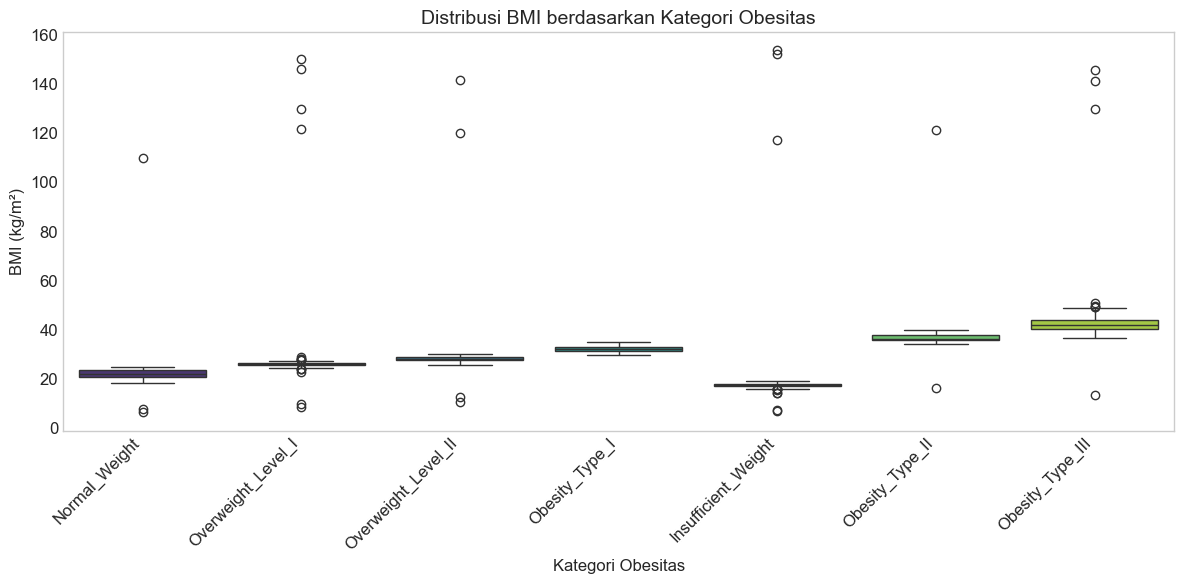

In [15]:
# Menghitung BMI (Body Mass Index)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Visualisasi BMI berdasarkan kategori obesitas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='NObeyesdad', y='BMI', palette='viridis')
plt.xlabel('Kategori Obesitas', fontsize=12)
plt.ylabel('BMI (kg/m²)', fontsize=12)
plt.title('Distribusi BMI berdasarkan Kategori Obesitas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()

## 12. Kesimpulan EDA

### Informasi Umum Dataset

* **Jumlah Baris:** 2.111 entri
* **Jumlah Kolom:** 17
* **Variabel Target:** `NObeyesdad` — merupakan label kategorikal yang merepresentasikan tingkat obesitas

### Masalah Data yang Teridentifikasi

1. **Inkonsistensi Tipe Data:**
   * Kolom `Age`, `Height`, `Weight`, `FAF`, `TUE`, `FCVC`, `CH2O`, `NCP` seharusnya bertipe numerik, tetapi tersimpan sebagai *object*
   * Dilakukan konversi tipe data setelah mengganti koma dengan titik sebagai pemisah desimal

2. **Nilai yang Hilang:**
   * Terdapat beberapa nilai yang hilang (simbol '?') yang telah diganti dengan NaN
   * Baris dengan nilai yang hilang telah dihapus karena jumlahnya relatif sedikit

3. **Ketidakseimbangan Kelas Target:**
   * Distribusi kelas target tidak merata, dengan beberapa kategori obesitas yang memiliki frekuensi lebih tinggi
   * Diperlukan teknik oversampling/undersampling pada tahap pemodelan untuk mengatasi ketidakseimbangan ini

4. **Outlier:**
   * Terdeteksi outlier pada beberapa fitur numerik, terutama pada `Age`, `Height`, dan `Weight`
   * Outlier ini perlu dipertimbangkan dalam proses preprocessing lebih lanjut

### Wawasan Penting

1. **Hubungan Fitur-Target:**
   * Terdapat korelasi yang kuat antara `Weight` dan kategori obesitas, yang merupakan hubungan yang diharapkan
   * BMI (fitur turunan) menunjukkan pola yang jelas untuk membedakan kategori obesitas

2. **Faktor Potensial:**
   * Kebiasaan makan dan aktivitas fisik terlihat memiliki hubungan dengan kategori obesitas
   * Faktor demografis seperti gender juga menunjukkan pola yang berbeda dalam distribusi obesitas

### Langkah Selanjutnya

1. **Preprocessing Data:**
   * Penanganan outlier dengan metode robust scaling atau capping
   * Encoding fitur kategorikal (one-hot encoding/label encoding)
   * Normalisasi/standardisasi fitur numerik

2. **Pemodelan:**
   * Menerapkan teknik balancing class (SMOTE/oversampling)
   * Seleksi fitur berdasarkan korelasi dan importance
   * Implementasi model klasifikasi (Random Forest, Gradient Boosting, dll.)

3. **Evaluasi Model:**
   * Menggunakan metrik yang sesuai untuk masalah klasifikasi multi-kelas (accuracy, macro F1-score, confusion matrix)
   * Analisis fitur importance untuk mengidentifikasi faktor utama yang mempengaruhi obesitas